# Scientific Python Final Project
Topic: Examining the potential barriers to structural transformation in the Thai economy

Phakphum Jatupitpornchan

## Introduction

One main reason why many countries are still poor is that many of labor force are working in agricultural sector which is significantly less productive than other sectors. Strucutral transformation is usually defined as the process of transition from an economy dominated by agriculture to one dominated by industry and services. This process is often associated with economic growth and development. 

In this project, I aim to find suggestive evidence of what might be important factors that hinder the structural transformation in the Thai economy. The purpose of this exercise is to identify potential barriers which can be studied further in depth in the future. 

I use data from the World Development Indicators (WDI) and the UNDP Human Development Index to make international comparisons. I also use data from the Thai Labour Force Survey to make spatial comparisons within the country and to examine other dimensions of the problem.

Unfortunately, I found that Pyreadstat (needed to read SAV files) cannot read files on remote drives[^1]. Therefore, you will have to download the data onto your local machine to run the code. The data can be downloaded from the following links: https://drive.google.com/file/d/1O9mBmdLpJLvWrlo2EA0FgxixG82dwaAO/view?usp=sharing. 

I would like to apologize in advance since total file size is quite large when extracted (1.16 GB.).

[^1]: https://stackoverflow.com/questions/74214114/loading-a-sav-file-in-google-collab

## Results from international data.

First, I import the data. The data from the World Development Indicators (WDI) contains the statistics of various countries on GDP per Capita PPP (constant 2017 international $) and the employment share in agriculture from 1992 to 2021[^2]. The data from the UNDP Human Development contains the mean years of schooling among the population aged 25 years and older from 1992 to 2019 [^3].

Then, I pre-process the data by formatting them into a more usable way and merging them together.

[^2]: The data is from the World Bank. The data is available at https://databank.worldbank.org/source/world-development-indicators#
[^3]: The data is from the United Nations Development Programme. The data is available at https://hdr.undp.org/data-center/documentation-and-downloads

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat

In [7]:
## Import data
data_WB = pd.read_excel("Data\P_Data_Extract_From_World_Development_Indicators.xlsx")
data_UNDP = pd.read_excel("Data\HDR23-24_Composite_indices_complete_time_series.xlsx")


In [8]:
data_WB.head()

,Country Name,Country Code,Series Name,Series Code,1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Afghanistan,AFG,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,64.771185,65.059005,65.186009,65.169112,65.061514,65.187699,...,47.697315,44.798594,44.593516,44.337137,43.989031,44.4536,45.01604,45.983408,46.587823,46.58907
1,Afghanistan,AFG,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,..,..,..,..,..,..,...,2165.340915,2144.449634,2108.714173,2101.422187,2096.093111,2060.698973,2079.921861,1968.341002,1516.273265,..
2,Albania,ALB,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,53.198792,52.987349,52.735871,52.413215,52.203394,51.75494,...,44.198027,42.257063,41.283525,40.040852,38.078346,37.285732,36.416856,36.190744,35.640848,34.926718
3,Albania,ALB,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,3264.814253,3598.803098,3921.607158,4471.592795,4908.922613,4400.303989,...,11361.22986,11586.794365,11878.41394,12291.817575,12770.966424,13317.092736,13653.15501,13278.343318,14595.915311,15491.961002
4,Algeria,DZA,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,23.967045,23.853056,23.734053,23.556856,23.372809,23.075537,...,10.753295,9.746314,8.834767,8.535155,10.16129,10.092127,9.798442,10.023791,10.033098,9.74323


In [9]:
data_UNDP.head()

,iso3,country,mys_1992,mys_1993,mys_1994,mys_1995,mys_1996,mys_1997,mys_1998,mys_1999,...,mys_2013,mys_2014,mys_2015,mys_2016,mys_2017,mys_2018,mys_2019,mys_2020,mys_2021,mys_2022
0,AFG,Afghanistan,0.958573,1.001878,1.045184,1.088489,1.123602,1.158715,1.193827,1.228940,...,2.030677,2.077493,2.124310,2.267770,2.411230,2.554690,2.698150,2.841610,2.985070,2.514790
1,ALB,Albania,7.350875,7.348996,7.347118,7.345239,7.627026,7.908813,8.190599,8.472386,...,10.015428,10.005746,9.996064,9.986382,9.976700,10.024848,10.072996,10.121144,10.121144,10.121144
2,DZA,Algeria,5.046033,5.261745,5.477458,5.693170,5.876116,6.059062,6.242008,6.424954,...,7.220021,7.186729,7.153437,7.120145,7.086854,7.053562,7.020270,6.987444,6.987444,6.987444
3,AND,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.616062,10.645040,10.573280,10.556100,10.732323,10.908546,11.084770,11.260993,11.437216,11.613440
4,AGO,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.387043,...,3.950236,3.990690,5.315630,5.417391,5.521100,5.626794,5.734512,5.844292,5.844292,5.844292


In [10]:
### Pivot the WB data. Have each Series as a dataframe.
# GDP
GDP_DF = data_WB[data_WB['Series Name'] == 'GDP per capita, PPP (constant 2017 international $)']
# Agricultural Employment
Agri_Emp_DF = data_WB[data_WB['Series Name'] == 'Employment in agriculture (% of total employment) (modeled ILO estimate)']

## Have each year as a row.
GDP_DF = GDP_DF.melt(id_vars = ['Country Name', 'Country Code', 'Series Name', 'Series Code'], var_name = 'Year', value_name = 'GDP')
Agri_Emp_DF = Agri_Emp_DF.melt(id_vars = ['Country Name', 'Country Code', 'Series Name', 'Series Code'], var_name = 'Year', value_name = 'Agri_Emp')
Edu_DF = data_UNDP.melt(id_vars = ['iso3', 'country'], var_name = 'Year', value_name = 'Year_Schooling')

In [11]:
GDP_DF.head()

,Country Name,Country Code,Series Name,Series Code,Year,GDP
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1992 [YR1992],..
1,Albania,ALB,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1992 [YR1992],3264.814253
2,Algeria,DZA,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1992 [YR1992],8471.527605
3,American Samoa,ASM,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1992 [YR1992],..
4,Andorra,AND,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1992 [YR1992],..


In [12]:
## Keep only the first 4 characters of the year.
GDP_DF['Year'] = GDP_DF['Year'].str[:4]
Agri_Emp_DF['Year'] = Agri_Emp_DF['Year'].str[:4]
# for the UNDP data, the year is the last 4 characters
Edu_DF['Year'] = Edu_DF['Year'].str[-4:]

## Convert the year to integer.
GDP_DF['Year'] = GDP_DF['Year'].astype(int)
Agri_Emp_DF['Year'] = Agri_Emp_DF['Year'].astype(int)
Edu_DF['Year'] = Edu_DF['Year'].astype(int)

In [13]:
### Merge all dataframes.
ALL_VAR_DF = GDP_DF[['Country Name', 'Year', 'GDP']].merge(Agri_Emp_DF[['Country Name', 'Year', 'Agri_Emp']], on = ['Country Name', 'Year'], how = 'left')
ALL_VAR_DF = ALL_VAR_DF.merge(Edu_DF[['country', 'Year', 'Year_Schooling']], left_on = ['Country Name', 'Year'], right_on = ['country', 'Year'], how = 'left')

In [14]:
## Convert GDP, Year_Schooling and Agri_Emp to numeric.
ALL_VAR_DF['GDP'] = pd.to_numeric(ALL_VAR_DF['GDP'], errors = 'coerce')
ALL_VAR_DF['Year_Schooling'] = pd.to_numeric(ALL_VAR_DF['Year_Schooling'], errors = 'coerce')
ALL_VAR_DF['Agri_Emp'] = pd.to_numeric(ALL_VAR_DF['Agri_Emp'], errors = 'coerce')

In [15]:
ALL_VAR_DF.head()

,Country Name,Year,GDP,Agri_Emp,country,Year_Schooling
0,Afghanistan,1992,NaN,64.771185,Afghanistan,0.958573
1,Albania,1992,3264.814253,53.198792,Albania,7.350875
2,Algeria,1992,8471.527605,23.967045,Algeria,5.046033
3,American Samoa,1992,NaN,NaN,NaN,NaN
4,Andorra,1992,NaN,NaN,Andorra,NaN


Then, I focus only on countries which had similar level of GDP per Capita PPP in 1992 to Thailand (lower or higher by 25%) and countries which had similar level of mean years of schooling in 1992 to Thailand (lower or higher by 20%). Finally, I plot the data to see the relationship between these variables and patterns that might be suggestive of potential barriers to structural transformation.

In [26]:
### Create Dataframe containing countries which had similar level of GDP as Thailand in 1993
Thai_GDP_1993 = ALL_VAR_DF[(ALL_VAR_DF['Country Name'] == 'Thailand') & (ALL_VAR_DF['Year'] == 1993)]['GDP'].values[0]
range_gdp = [Thai_GDP_1993 *0.75, Thai_GDP_1993 * 1.25]

## Get names of countries.
Similar_GDP_Countries_1993 = ALL_VAR_DF[(ALL_VAR_DF['GDP'] >= range_gdp[0]) & (ALL_VAR_DF['GDP'] <= range_gdp[1]) & (ALL_VAR_DF['Year'] == 1993)]['Country Name'].unique()

## Create Dataframe containing countries in Similar_GDP_Countries.
Similar_Countries_DF_GDP_1993 = ALL_VAR_DF[ALL_VAR_DF['Country Name'].isin(Similar_GDP_Countries)]

Similar_GDP_Countries_1993

array(['Algeria', 'Belarus', 'Belize', 'Botswana', 'Brazil', 'Bulgaria',
       'Colombia', 'Costa Rica', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Fiji', 'Grenada', 'Iran, Islamic Rep.', 'Jamaica',
       'Jordan', 'Kazakhstan', 'Lebanon', 'Mauritius', 'North Macedonia',
       'Paraguay', 'Poland', 'Romania', 'South Africa',
       'St. Vincent and the Grenadines', 'Thailand',
       'Trinidad and Tobago'], dtype=object)

In [27]:
Similar_Countries_DF_GDP_1993

,Country Name,Year,GDP,Agri_Emp,country,Year_Schooling
2,Algeria,1992,8471.527605,23.967045,Algeria,5.046033
17,Belarus,1992,7923.649887,23.239002,Belarus,NaN
19,Belize,1992,7607.846370,28.263280,Belize,5.790401
25,Botswana,1992,9570.428758,15.953245,Botswana,5.996000
26,Brazil,1992,10103.787943,18.910836,Brazil,3.977296
...,...,...,...,...,...,...
6655,North Macedonia,2022,17128.642859,9.702911,North Macedonia,10.228150
6663,Paraguay,2022,13531.396663,17.412892,Paraguay,8.861840
6687,South Africa,2022,13478.753857,19.259582,South Africa,11.606970
6694,St. Vincent and the Grenadines,2022,14572.607030,9.710520,NaN,NaN


In [28]:
## Keep only data from 1993 to 2022.
Similar_Countries_DF_GDP_1993 = Similar_Countries_DF_GDP_1993[(Similar_Countries_DF_GDP_1993['Year'] >= 1993) & (Similar_Countries_DF_GDP_1993['Year'] <= 2022)]

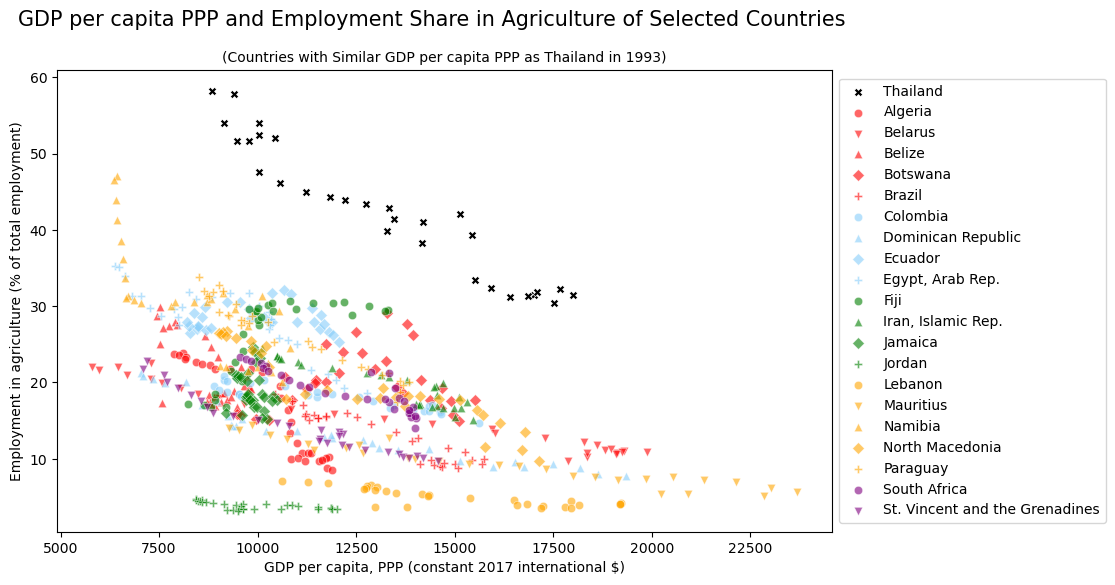

In [29]:
##### Scatter GDP and Agricultural Employment
plt.figure(figsize = (10, 6))

### Plot Thailand differently with a different marker.
sns.scatterplot(data = Similar_Countries_DF_GDP_1993[Similar_Countries_DF_GDP_1993["Country Name"] == "Thailand"], x = 'GDP', y = 'Agri_Emp' ,marker='X', color = 'black', label = "Thailand")

## Plot other countries.
colors = ['red', 'lightskyblue', 'green', 'orange', 'purple', 'teal', 'gold']
markers = ['o', 'v', '^', 'D', 'P']

### Get unique combinations of colors and markers.
color_marker_combinations = [(color, marker) for color in colors for marker in markers] ## Use this to plot the other countries.

# Plot
for i, country in enumerate(Similar_Countries_DF_GDP_1993[Similar_Countries_DF_GDP_1993["Country Name"] != "Thailand"]['Country Name'].unique()):
    sns.scatterplot(data = Similar_Countries_DF_GDP_1993[Similar_Countries_DF_GDP_1993["Country Name"] == country], x = 'GDP', y = 'Agri_Emp', marker = color_marker_combinations[i][1], color = color_marker_combinations[i][0], alpha = 0.60, label = country)
    
# Axes labels
plt.xlabel('GDP per capita, PPP (constant 2017 international $)')
plt.ylabel('Employment in agriculture (% of total employment)')
# Add title
plt.suptitle('GDP per capita PPP and Employment Share in Agriculture of Selected Countries', fontsize = 15)
plt.title('(Countries with Similar GDP per capita PPP as Thailand in 1993)', fontsize = 10)

# Show legend. Outside the plot.
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

The figure shows that there is a negative relationship between income of a country and the share of employment in agriculture which is a well-known fact. We can see that the pattern is not necessarily the same for all countries. 

One key observation is that Thailand has an unsually high share of employment in agriculture given its level of income. It stands out as a clear outlier.Next, I turn to investigate whether the level of education might be factor that could explain this puzzle.

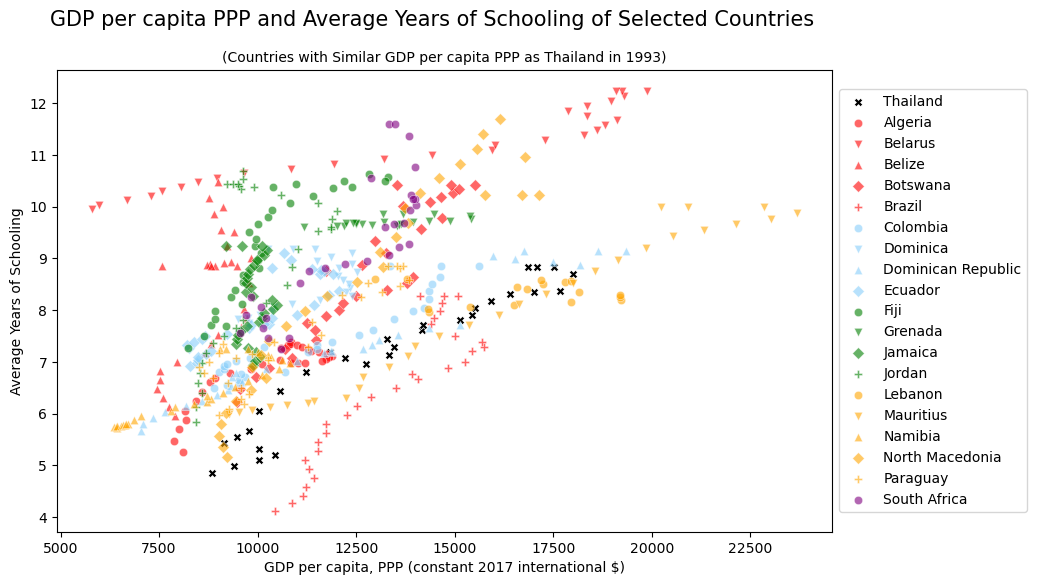

In [30]:
## Scatter GDP and Edu. 
plt.figure(figsize = (10, 6))

### Plot Thailand differently with a different marker.
sns.scatterplot(data = Similar_Countries_DF_GDP_1993[Similar_Countries_DF_GDP_1993["Country Name"] == "Thailand"], x = 'GDP', y = 'Year_Schooling' ,marker='X', color = 'black', label = "Thailand")

## Plot other countries.
colors = ['red', 'lightskyblue', 'green', 'orange', 'purple', 'teal', 'gold']
markers = ['o', 'v', '^', 'D', 'P']

### Get unique combinations of colors and markers.
color_marker_combinations = [(color, marker) for color in colors for marker in markers] ## Use this to plot the other countries.

# Plot
for i, country in enumerate(Similar_Countries_DF_GDP_1993[Similar_Countries_DF_GDP_1993["Country Name"] != "Thailand"]['Country Name'].unique()):
    sns.scatterplot(data = Similar_Countries_DF_GDP_1993[Similar_Countries_DF_GDP_1993["Country Name"] == country], x = 'GDP', y = 'Year_Schooling', marker = color_marker_combinations[i][1], color = color_marker_combinations[i][0], alpha = 0.60, label = country)

# Axes labels
plt.xlabel('GDP per capita, PPP (constant 2017 international $)')
plt.ylabel('Average Years of Schooling')

# Add title
plt.suptitle('GDP per capita PPP and Average Years of Schooling of Selected Countries', fontsize = 15)
plt.title('(Countries with Similar GDP per capita PPP as Thailand in 1993)', fontsize = 10)

# Show legend. Outside the plot.
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [14]:
#### Scatter GDP and Edu. (Sorry, I just relized that I should have only have 3 figures)
#plt.figure(figsize = (10, 6))

### Plot Thailand differently with a different marker.
#sns.scatterplot(data = Similar_Countries_DF_GDP[Similar_Countries_DF_GDP["Country Name"] == "Thailand"], x = 'GDP', y = 'Year_Schooling' ,marker='X', color = 'black', label = "Thailand")

## Plot other countries.
#colors = ['red', 'lightskyblue', 'green', 'orange', 'purple', 'teal', 'gold']
#markers = ['o', 'v', '^', 'D', 'P']

### Get unique combinations of colors and markers.
#color_marker_combinations = [(color, marker) for color in colors for marker in markers] ## Use this to plot the other countries.

# Plot
#for i, country in enumerate(Similar_Countries_DF_GDP[Similar_Countries_DF_GDP["Country Name"] != "Thailand"]['Country Name'].unique()):
    #sns.scatterplot(data = Similar_Countries_DF_GDP[Similar_Countries_DF_GDP["Country Name"] == country], x = 'GDP', y = 'Year_Schooling', marker = color_marker_combinations[i][1], color = color_marker_combinations[i][0], alpha = 0.60, label = country)

# Axes labels
#plt.xlabel('GDP per capita, PPP (constant 2017 international $)')
#plt.ylabel('Mean Years of Schooling Among Population Aged 25 and Older')

# Add title
#plt.suptitle('GDP per capita PPP and Years of Schooling of Selected Countries', fontsize = 15)
#plt.title('(Countries with Similar GDP per capita PPP as Thailand in 1992)', fontsize = 10)

# Show legend. Outside the plot.
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [15]:
### Scatter Edu and Agricultural Employment.(Sorry, I just relized that I should have only have 3 figures)
#plt.figure(figsize = (10, 6))

### Plot Thailand differently with a different marker.
#sns.scatterplot(data = Similar_Countries_DF_EDU[Similar_Countries_DF_EDU["Country Name"] == "Thailand"], x = 'Year_Schooling', y = 'Agri_Emp' ,marker='X', color = 'black', label = "Thailand")

## Plot other countries.
#colors = ['red', 'lightskyblue', 'green', 'orange', 'purple', 'teal', 'gold']
#markers = ['o', 'v', '^', 'D', 'P']

### Get unique combinations of colors and markers.
#color_marker_combinations = [(color, marker) for color in colors for marker in markers] ## Use this to plot the other countries.

# Plot
#for i, country in enumerate(Similar_Countries_DF_EDU[Similar_Countries_DF_EDU["Country Name"] != "Thailand"]['Country Name'].unique()):
    #sns.scatterplot(data = Similar_Countries_DF_EDU[Similar_Countries_DF_EDU["Country Name"] == country], x = 'Year_Schooling', y = 'Agri_Emp', marker = color_marker_combinations[i][1], color = color_marker_combinations[i][0], alpha = 0.60, label = country)


# Axes labels
#plt.xlabel('Mean Years of Schooling Among Population Aged 25 and Older')
#plt.ylabel('Employment in agriculture (% of total employment)')

# Add title
#plt.suptitle('Mean Years of Schooling and Employment Share in Agriculture of Selected Countries', fontsize = 15)
#plt.title('(Countries with Similar Mean Years of Schooling as Thailand in 1992)', fontsize = 10)

# Show legend. Outside the plot.
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

From the second figure, it can be seen that Thailand has relatively low mean years of schooling compared to countries with similar level of income. So, education might be an important barrier to structural transformation in Thailand. But it does not stand out as an outlier in the same way as the first figure. 

Additionally, the last figure shows that Thailand also has a relatively high level of agricultural employment given its level of education. If the level of agricultural employment in Thailand were in line with what we would expect given the level of education, then it would suggest that education is potentially the main explanation for the puzzle. However, this is not the case.

Hence, based on the two figures, it seems that education is surely an important factor but there are other important factors that could explain the high level of agricultural employment in Thailand. Particularly, I will investigate factors that are related to relative labor demand in each sector.

## Illustrative Example of Analysis on One Year of Microdata (Can be skipped)

Since I will have to loop through all years of the Thai Labour Force Survey (LFS) data that I have, it might be hard to understand the code. Therefore, I will illustrate the analysis on one year of data first. The example is also used to built functions that will be applied to all years of data as well.

I use the LFS from 2001 - 2020 (B.E. 2544 - 2563). For data from 2001 - 2012, I only have data from the 3rd quarter of each year. For the rest, I have the data from all quarters. I use the first quarter data from 2013 (B.E. 2556) as an example.

Essentially, I am interested to see how the distribution of employment across sectors, education, and wages has changed over time in each region.

The first step is to import the data and see what each column means.

In [16]:
### Import Labor force survey 
## 2556 Q1
LFS_56_Q1, meta_56_Q1 = pyreadstat.read_sav("Data_Final_Project\LFS561.SAV")

In [17]:
LFS_56_Q1

,REG,CWD,AMP,TMB,AREA,ED,VILLAGE,BLKV,ROTA_GR,SAMSET,...,EFFECT_ND,EFFECT_RD,LAY_OFF,ASSIST,Desire,Course,Ryear,Dcourse,No_Desire,yround
0,1.0,10.0,1.0,2.0,1.0,17.0,0.0,151.0,2.0,A,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,561.0
1,1.0,10.0,1.0,2.0,1.0,17.0,0.0,151.0,2.0,A,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,561.0
2,1.0,10.0,1.0,2.0,1.0,17.0,0.0,151.0,2.0,A,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,561.0
3,1.0,10.0,1.0,2.0,1.0,17.0,0.0,151.0,2.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,561.0
4,1.0,10.0,1.0,2.0,1.0,17.0,0.0,151.0,2.0,A,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,5.0,561.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226611,5.0,96.0,13.0,3.0,2.0,9.0,7.0,54.0,3.0,B,...,NaN,NaN,NaN,NaN,1.0,31.0,0.0,NaN,NaN,561.0
226612,5.0,96.0,13.0,3.0,2.0,9.0,7.0,54.0,3.0,B,...,NaN,NaN,NaN,NaN,1.0,31.0,0.0,NaN,NaN,561.0
226613,5.0,96.0,13.0,3.0,2.0,9.0,7.0,54.0,3.0,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,561.0
226614,5.0,96.0,13.0,3.0,2.0,9.0,7.0,54.0,3.0,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,561.0


In [18]:
### What does each column mean
meta_56_Q1.column_names_to_labels

{'REG': 'REGION',
 'CWD': 'CHANGWAD IN REGION',
 'AMP': None,
 'TMB': None,
 'AREA': 'AREA',
 'ED': None,
 'VILLAGE': None,
 'BLKV': None,
 'ROTA_GR': 'ROTATION GROUP',
 'SAMSET': 'SAMPLE SET',
 'MONTH': 'MONTH',
 'YEAR': 'YEAR',
 'HH_NO': 'HOUSEHOLD NUMBER',
 'HH_TYPE': 'HOUSEHOLD TYPE',
 'HH_MEM': 'NUMBER OF PERSON IN HOUSEHOLD',
 'LISTING': 'LISTING OF PERSON IN HOUSEHOLD',
 'ENUM': 'ENUMERATION',
 'LINE_NO': 'HH MEMBER NO.',
 'RELA': 'RELATION TO HEAD OF HH',
 'SEX': 'SEX',
 'AGE': 'AGE',
 'MRSTAT': 'MARITAL STATUS',
 'STUDYLEV': 'ATTENDING SCHOOL LEVEL',
 'GRADE': 'GRADE COMPLETED',
 'SUBJECT': 'SUBJECT COMPLETED',
 'LINE': 'SUBJECT FOR HIGHEST EDUCATION COMPLETED',
 'WKLW': 'WORK LAST WEEK',
 'RECEIVE': 'RECEIVE INCOME',
 'PERJOB': 'HAVE PERMANENT JOB',
 'ABSENT': 'HOW LONG LEAVE',
 'LOOKWK': 'LOOKED FOR WORK',
 'METHOD': 'HOW LOOKED FOR WORK',
 'AVAIWK': 'AVAILABLE FOR WORK',
 'REUNWK': 'REASON UNAVAILABLE FOR WORK',
 'RE_NLOOK': 'REASON NOT LOOKING FOR WORK',
 'LENLKWK': 'HOW L

### Preprocessing (Excluding non-labor forces, creating/recoding variables)

The dataset also contains people who are not in the labor force as well. We need to exclude them from the analysis. This can be done by using the variable "WKCODE".

Based on the data dictionary, I create a function which exclude samples based on the value of "WKCODE".

In [19]:
### Crete functions to exclude people who are not in labor force.
## Excluding people who are not in labor force (2544 - recent)
def exclude_not_LFfrom44(LFS_df): # drop WKCODE == 06-07 or >= 09.
    x = LFS_df.drop(LFS_df[(LFS_df["WKCODE"] == 6) | (LFS_df["WKCODE"] == 7) | (LFS_df["WKCODE"] >= 9)].index)
    return x

In [20]:
## Apply the function to the data (use pipe since the input is a dataframe)
LFS_56_Q1 = LFS_56_Q1.pipe(exclude_not_LFfrom44)

Next, I create a variable indicator the sectors which the worker is employed. This is created based on the value of "INDUST". Since the value of "INDUST" changes as new standards get adopted. I have to create several version of functions.

In [21]:
### Define function to code SECTOR (from the first two digits of INDUST)

## function for 2544-2553.
def sector_create_44to53(row):
    # First, convert INDUST from float to string.
    x = str(row["INDUST"])
    # remove the decimal part.
    x = x.split(".")[0]

    # If x is missing, return missing.
    if x == "nan":
        return np.nan
    
    ## In case x is less than 4 digits, add 0 in front. And use the first two digits.
    elif len(x) < 4:
        x = "0" + x
        x = x[:2]
        ## Convert the string back to integer.
        x = int(x)
    
    ## If it is already 4 digits, take it as it is.
    elif len(x) == 4:
        x = x[:2]
        ## Convert the string back to integer.
        x = int(x)

    ## Create the SECTOR code.
    # Agriculture: 01-05
    if (x >= 1) & (x <= 5):
        return "Agriculture"
    # Industry: 10-45
    elif (x >= 10) & (x <= 45):
        return "Industry"
    # Services: 50-99
    elif (x >= 50) & (x <= 99):
        return "Services"


## function for 2554.
def sector_create_54(row):
    # First, convert INDUST from float to string.
    x = str(row["INDUST"])
    # remove the decimal part.
    x = x.split(".")[0]

    # If x is missing, return missing.
    if x == "nan":
        return np.nan

    ## In case x is less than 4 digits, add 0 in front. And use the first two digits.
    elif len(x) < 4:
        x = "0" + x
        x = x[:2]
        ## Convert the string back to integer.
        x = int(x)
    
    ## If it is already 4 digits, take it as it is.
    elif len(x) == 4:
        x = x[:2]
        ## Convert the string back to integer.
        x = int(x)

    ## Create the SECTOR code.
    # Agriculture: 01-03
    if (x >= 1) & (x <= 3):
        return "Agriculture"
    # Industry: 05-43
    elif (x >= 5) & (x <= 43):
        return "Industry"
    # Services: 45-99
    elif (x >= 45) & (x <= 99):
        return "Services"
    

## function for 2555-recent.
def sector_create_from55(row):
    # First, convert INDUST from float to string.
    x = str(row["INDUST"])
    # remove the decimal part.
    x = x.split(".")[0]

    # If x is missing, return missing.
    if x == "nan":
        return np.nan
    
    ## In case x is less than 5 digits, add 0 in front. And use the first two digits.
    elif len(x) < 5:
        x = "0" + x
        x = x[:2]
        ## Convert the string back to integer.
        x = int(x)
    
    ## If it is already 5 digits, take it as it is.
    elif len(x) == 5:
        x = x[:2]
        ## Convert the string back to integer.
        x = int(x)

    ## Create the SECTOR code.
    # Agriculture: 01-03
    if (x >= 1) & (x <= 3):
        return "Agriculture"
    # Industry: 05-43
    elif (x >= 5) & (x <= 43):
        return "Industry"
    # Services: 45-99
    elif (x >= 45) & (x <= 99):
        return "Services"

In [22]:
### Apply the function to the dataframe.
LFS_56_Q1["SECTOR"] = LFS_56_Q1.apply(sector_create_from55, axis = 1)

Next, I recode education level into 4 categories. 1) Elementary or lower 2) Lower secondary education 3) Upper secondary or Associate 4) Bachelor or higher. This is done by using the variable "EDCODE". Since the value of "EDCODE" also changes as new standards get adopted. I have to create two version of functions.

In [23]:
### Define fuctions to recode EDCODE.
## Regroup EDCODE to 4 categories (2544 - 2549)
def EDCODE_NEW_44to49(row):
    if row["EDCODE"] < 3:
        return "Elementary or lower"
    elif row["EDCODE"] == 4:
        return "Lower secondary"
    elif (row["EDCODE"] >= 5) & (row["EDCODE"] <= 10):
        return "Upper secondary or Associate"
    elif (row["EDCODE"] >= 11) & (row["EDCODE"] <= 13):
        return "Bachelor or higher"
    else: 
        return "Other/Unknown"

## Regroup EDCODE to 4 categories (2550 - recent)
def EDCODE_NEW_50(row):
    if row["EDCODE"] < 3:
        return "Elementary or lower"
    elif row["EDCODE"] == 4:
        return "Lower secondary"
    elif (row["EDCODE"] >= 5) & (row["EDCODE"] <= 10):
        return "Upper secondary or Associate"
    elif (row["EDCODE"] >= 11) & (row["EDCODE"] <= 15):
        return "Bachelor or higher"
    else: 
        return "Other/Unknown"

In [24]:
## Apply the function to the dataframe.
LFS_56_Q1["EDCODE_NEW"] = LFS_56_Q1.apply(EDCODE_NEW_50, axis = 1)

LFS_56_Q1.head()

,REG,CWD,AMP,TMB,AREA,ED,VILLAGE,BLKV,ROTA_GR,SAMSET,...,LAY_OFF,ASSIST,Desire,Course,Ryear,Dcourse,No_Desire,yround,SECTOR,EDCODE_NEW
0,1.0,10.0,1.0,2.0,1.0,17.0,0.0,151.0,2.0,A,...,NaN,NaN,2.0,NaN,NaN,NaN,2.0,561.0,Services,Bachelor or higher
1,1.0,10.0,1.0,2.0,1.0,17.0,0.0,151.0,2.0,A,...,NaN,NaN,2.0,NaN,NaN,NaN,2.0,561.0,Services,Upper secondary or Associate
2,1.0,10.0,1.0,2.0,1.0,17.0,0.0,151.0,2.0,A,...,NaN,NaN,2.0,NaN,NaN,NaN,2.0,561.0,Services,Other/Unknown
3,1.0,10.0,1.0,2.0,1.0,17.0,0.0,151.0,2.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,561.0,NaN,Other/Unknown
4,1.0,10.0,1.0,2.0,1.0,17.0,0.0,151.0,2.0,A,...,NaN,NaN,2.0,NaN,NaN,NaN,5.0,561.0,Services,Elementary or lower


### Tabulating the data

#### Distribution of employment across sectors

In [25]:
### Table of the number of people in each sector by region.
## Tabulate the data.
LFS_56_Q1_SEC_REG = LFS_56_Q1.groupby(["REG", "SECTOR"]).agg({"WT": "sum"}).reset_index() 

## Create a new column for the percentage of each sector.
LFS_56_Q1_SEC_REG["Percentage"] = LFS_56_Q1_SEC_REG.groupby('REG')["WT"].apply(lambda x: x / x.sum() * 100).reset_index().WT

In [26]:
## Compute the total number of people in each sector at the national level.
LFS_56_Q1_SEC_NAT = LFS_56_Q1_SEC_REG.groupby("SECTOR").agg({"WT": "sum"}).reset_index()

## Create column REG for the national level to be consistent.
LFS_56_Q1_SEC_NAT["REG"] = 0

## Create a new column for the percentage of each sector.
LFS_56_Q1_SEC_NAT["Percentage"] = LFS_56_Q1_SEC_NAT["WT"]/LFS_56_Q1_SEC_NAT["WT"].sum() * 100

# Make the order of columns the same as LFS_56_Q1_SEC_REG
LFS_56_Q1_SEC_NAT = LFS_56_Q1_SEC_NAT[LFS_56_Q1_SEC_REG.columns]

In [27]:
## Concatenate the two df.
LFS_56_Q1_SEC_REG = pd.concat([LFS_56_Q1_SEC_NAT, LFS_56_Q1_SEC_REG]).reset_index(drop=True)

## remove the dataframes that are no longer needed.
del LFS_56_Q1_SEC_NAT

LFS_56_Q1_SEC_REG

,REG,SECTOR,WT,Percentage
0,0.0,Agriculture,1.392290e+07,35.984970
1,0.0,Industry,8.806283e+06,22.760623
2,0.0,Services,1.596169e+07,41.254408
3,1.0,Agriculture,3.231122e+04,0.820253
4,1.0,Industry,9.702152e+05,24.629895
5,1.0,Services,2.936651e+06,74.549852
6,2.0,Agriculture,2.345421e+06,24.242519
7,2.0,Industry,3.238230e+06,33.470683
8,2.0,Services,4.091174e+06,42.286798
9,3.0,Agriculture,3.364770e+06,46.649842


#### Distribution of education attainment

In [28]:
### Tabulate the data. Get the number of people in each education catagory, in each region.
## Tabulate the data.
LFS_56_Q1_EDU_REG_TOTAL = LFS_56_Q1.groupby(["REG", "EDCODE_NEW"]).agg({"WT": "sum"}).reset_index() ## Don't sort by the alphabetical order.

## Exclude the "Other/Unknown" category.
LFS_56_Q1_EDU_REG_TOTAL = LFS_56_Q1_EDU_REG_TOTAL[LFS_56_Q1_EDU_REG_TOTAL["EDCODE_NEW"] != "Other/Unknown"].reset_index(drop=True) ## drop previous index (otherwise it becomes a new column)

## Create a new column for the percentage of each education level in each region.
LFS_56_Q1_EDU_REG_TOTAL["Percentage"] = LFS_56_Q1_EDU_REG_TOTAL.groupby("REG")["WT"].apply(lambda x: x/x.sum()*100).reset_index().WT

In [29]:
## Compute the total number of people in each education level at the national level
LFS_56_Q1_EDU_NAT_TOTAL = LFS_56_Q1_EDU_REG_TOTAL.groupby(["EDCODE_NEW"]).agg({"WT": "sum"}).reset_index()

## Create column REG for the national level to be consistent.
LFS_56_Q1_EDU_NAT_TOTAL["REG"] = 0

## Create a new column for the percentage of each education level
LFS_56_Q1_EDU_NAT_TOTAL["Percentage"] = LFS_56_Q1_EDU_NAT_TOTAL["WT"]/LFS_56_Q1_EDU_NAT_TOTAL["WT"].sum()*100

# Make the order of columns the same as LFS_56_Q1_EDU_REG_TOTAL
LFS_56_Q1_EDU_NAT_TOTAL = LFS_56_Q1_EDU_NAT_TOTAL[LFS_56_Q1_EDU_REG_TOTAL.columns]

In [30]:
## Concatenate the national level data to the regional level data.
LFS_56_Q1_EDU_REG_TOTAL = pd.concat([LFS_56_Q1_EDU_NAT_TOTAL, LFS_56_Q1_EDU_REG_TOTAL], axis = 0).reset_index(drop=True) ## drop previous index entirely.

## remove the dataframes that are no longer needed.
del LFS_56_Q1_EDU_NAT_TOTAL


### Sort the table by EDCODE_NEW.
custom_dict_edu = {'Elementary or lower': 0, 'Lower secondary': 1, 'Upper secondary or Associate': 2, 'Bachelor or higher': 3, 'Other/Unknown': 4}

# Convert EDCODE_NEW to an ordered categorical data type
LFS_56_Q1_EDU_REG_TOTAL['EDCODE_NEW'] = pd.Categorical(LFS_56_Q1_EDU_REG_TOTAL['EDCODE_NEW'], categories=custom_dict_edu.keys(), ordered=True)

# Sort the table by EDCODE_NEW and REG_NEW
LFS_56_Q1_EDU_REG_TOTAL.sort_values(by=['REG', 'EDCODE_NEW'], inplace=True, ignore_index = True)

In [31]:
LFS_56_Q1_EDU_REG_TOTAL

,REG,EDCODE_NEW,WT,Percentage
0,0.0,Elementary or lower,1.083929e+07,36.263727
1,0.0,Lower secondary,6.374162e+06,21.325273
2,0.0,Upper secondary or Associate,7.574642e+06,25.341573
3,0.0,Bachelor or higher,5.102083e+06,17.069428
4,1.0,Elementary or lower,5.126942e+05,15.501639
5,1.0,Lower secondary,5.457157e+05,16.500065
6,1.0,Upper secondary or Associate,8.813673e+05,26.648709
7,1.0,Bachelor or higher,1.367577e+06,41.349587
8,2.0,Elementary or lower,2.527710e+06,33.324719
9,2.0,Lower secondary,1.719019e+06,22.663137


#### Average Wages

In [32]:
### Compute weigthed average wage for each sector.
LFS_56_Q1_SEC_WAGE = LFS_56_Q1[LFS_56_Q1.PERMONTH != 99999].dropna(subset = ["PERMONTH"]).groupby(["REG", "SECTOR"]).apply(lambda x: np.average(x["PERMONTH"], weights = x["WT"])).reset_index(name = "WAGE")

## Compute the average wage for each sector at the national level.
LFS_56_Q1_SEC_WAGE_NAT = LFS_56_Q1[LFS_56_Q1.PERMONTH != 99999].dropna(subset = ["PERMONTH"]).groupby(["SECTOR"]).apply(lambda x: np.average(x["PERMONTH"], weights = x["WT"])).reset_index(name = "WAGE")

## Create column REG for the national level to be consistent.
LFS_56_Q1_SEC_WAGE_NAT["REG"] = 0

## Make the order of columns the same as LFS_56_Q1_SEC_WAGE
LFS_56_Q1_SEC_WAGE_NAT = LFS_56_Q1_SEC_WAGE_NAT[LFS_56_Q1_SEC_WAGE.columns]

## Concatenate the national level data to the regional level data.
LFS_56_Q1_SEC_WAGE = pd.concat([LFS_56_Q1_SEC_WAGE_NAT, LFS_56_Q1_SEC_WAGE]).reset_index(drop=True)

## remove the dataframes that are no longer needed.
del LFS_56_Q1_SEC_WAGE_NAT

LFS_56_Q1_SEC_WAGE

,REG,SECTOR,WAGE
0,0.0,Agriculture,10997.996610
1,0.0,Industry,11567.493395
2,0.0,Services,17809.009645
3,1.0,Agriculture,7109.663851
4,1.0,Industry,20107.920812
5,1.0,Services,24686.848701
6,2.0,Agriculture,11978.160205
7,2.0,Industry,12431.042237
8,2.0,Services,17484.455213
9,3.0,Agriculture,8386.301686


### Setting up functions for streamling the process on data from all periods.

In [33]:
#### Turning the above code into a function. Must apply (pipe) to the dataframe.
### Function for RECODING, EXCLUDING NON-LABOR FORCE (2555 - recent)

def LFS_from55_clean(LFS_df):
    ## Exclude people who are not in labor force.
    LFS_df = LFS_df.pipe(exclude_not_LFfrom44)

    ## Recode SECTOR
    LFS_df["SECTOR"] = LFS_df.apply(sector_create_from55, axis = 1)
        
    ## Recode EDCODE
    LFS_df["EDCODE_NEW"] = LFS_df.apply(EDCODE_NEW_50, axis = 1)
    
    return LFS_df

In [34]:
### Function for RECODING, EXCLUDING NON-LABOR FORCE 2554
def LFS_54_clean(LFS_df):
    ## Exclude people who are not in labor force.
    LFS_df = LFS_df.pipe(exclude_not_LFfrom44)

    ## Recode SECTOR
    LFS_df["SECTOR"] = LFS_df.apply(sector_create_54, axis = 1)

    ## Recode EDCODE
    LFS_df["EDCODE_NEW"] = LFS_df.apply(EDCODE_NEW_50, axis = 1)

    return LFS_df

In [35]:
### Function for RECODING, EXCLUDING NON-LABOR FORCE (2550 - 2553)
def LFS_50to53_clean(LFS_df):
    ## Exclude people who are not in labor force.
    LFS_df = LFS_df.pipe(exclude_not_LFfrom44)

    ## Recode SECTOR
    LFS_df["SECTOR"] = LFS_df.apply(sector_create_44to53, axis = 1)

    ## Recode EDCODE
    LFS_df["EDCODE_NEW"] = LFS_df.apply(EDCODE_NEW_50, axis = 1)

    return LFS_df

In [36]:
### Function for RECODING, EXCLUDING NON-LABOR FORCE (2544 - 2549)
def LFS_44to49_clean(LFS_df):
    ## Exclude people who are not in labor force.
    LFS_df = LFS_df.pipe(exclude_not_LFfrom44)

    ## Recode SECTOR
    LFS_df["SECTOR"] = LFS_df.apply(sector_create_44to53, axis = 1)

    ## Recode EDCODE
    LFS_df["EDCODE_NEW"] = LFS_df.apply(EDCODE_NEW_44to49, axis = 1)

    return LFS_df

In [37]:
### Function for Tabulate sector.
def TAB_SEC(LFS):
        ### Number of people in each sector by region.
        LFS_SEC_REG = LFS.groupby(["REG", "SECTOR"]).agg({"WT": "sum"}).reset_index()
        LFS_SEC_REG["Percentage"] = LFS_SEC_REG.groupby('REG')["WT"].apply(lambda x: x / x.sum() * 100).reset_index().WT
        LFS_SEC_NAT = LFS_SEC_REG.groupby("SECTOR").agg({"WT": "sum"}).reset_index()
        LFS_SEC_NAT["REG"] = 0
        LFS_SEC_NAT["Percentage"] = LFS_SEC_NAT["WT"]/LFS_SEC_NAT["WT"].sum() * 100
        LFS_SEC_NAT = LFS_SEC_NAT[LFS_SEC_REG.columns]
        LFS_SEC_REG = pd.concat([LFS_SEC_NAT, LFS_SEC_REG]).reset_index(drop=True)

        return LFS_SEC_REG

In [38]:
### Function for Tabulate education level.
def TAB_EDU(LFS):
        ### Tabulate the data. Get the number of people in each education level, in each region.
        LFS_EDU_REG_TOTAL = LFS.groupby(["REG", "EDCODE_NEW"]).agg({"WT": "sum"}).reset_index() ## Don't sort by the alphabetical order.
        LFS_EDU_REG_TOTAL = LFS_EDU_REG_TOTAL[LFS_EDU_REG_TOTAL["EDCODE_NEW"] != "Other/Unknown"].reset_index(drop=True) ## drop previous index (otherwise it becomes a new column)
        LFS_EDU_REG_TOTAL["Percentage"] = LFS_EDU_REG_TOTAL.groupby("REG")["WT"].apply(lambda x: x/x.sum()*100).reset_index().WT
        LFS_EDU_NAT_TOTAL = LFS_EDU_REG_TOTAL.groupby(["EDCODE_NEW"]).agg({"WT": "sum"}).reset_index()
        LFS_EDU_NAT_TOTAL["REG"] = 0
        LFS_EDU_NAT_TOTAL["Percentage"] = LFS_EDU_NAT_TOTAL["WT"]/LFS_EDU_NAT_TOTAL["WT"].sum()*100
        LFS_EDU_NAT_TOTAL = LFS_EDU_NAT_TOTAL[LFS_EDU_REG_TOTAL.columns]
        LFS_EDU_REG_TOTAL = pd.concat([LFS_EDU_NAT_TOTAL, LFS_EDU_REG_TOTAL], axis = 0).reset_index(drop=True) ## drop previous index entirely.
        custom_dict_edu = {'Elementary or lower': 0, 'Lower secondary': 1, 'Upper secondary or Associate': 2, 'Bachelor or higher': 3, 'Other/Unknown': 4}
        LFS_EDU_REG_TOTAL['EDCODE_NEW'] = pd.Categorical(LFS_EDU_REG_TOTAL['EDCODE_NEW'], categories=custom_dict_edu.keys(), ordered=True)
        LFS_EDU_REG_TOTAL.sort_values(by=['REG', 'EDCODE_NEW'], inplace=True, ignore_index = True)

        return LFS_EDU_REG_TOTAL

In [39]:
### Function for calculating the average wage for each sector.
def avg_wage(LFS):
    ### Compute weigthed average wage for each sector.
    LFS_SEC_WAGE = LFS[LFS.PERMONTH != 99999].dropna(subset = ["PERMONTH"]).groupby(["REG", "SECTOR"]).apply(lambda x: np.average(x["PERMONTH"], weights = x["WT"])).reset_index(name = "WAGE")
    LFS_SEC_WAGE_NAT = LFS[LFS.PERMONTH != 99999].dropna(subset = ["PERMONTH"]).groupby(["SECTOR"]).apply(lambda x: np.average(x["PERMONTH"], weights = x["WT"])).reset_index(name = "WAGE")
    LFS_SEC_WAGE_NAT["REG"] = 0
    LFS_SEC_WAGE_NAT = LFS_SEC_WAGE_NAT[LFS_SEC_WAGE.columns]
    LFS_SEC_WAGE = pd.concat([LFS_SEC_WAGE_NAT, LFS_SEC_WAGE]).reset_index(drop=True)

    return LFS_SEC_WAGE

## Analysis from All Years of Microdata.

We loop thorugh each year of the Thai Labour Force Survey data in this section. In each year, the data is pre-processed, tabulated, and stored in dictionaries. The values in the dictionaries are combined into dataframes and visualized.

### Process data in each year.

#### From 2556 - 2563. All quarters.
(This may take 3-4 minutes)

In [40]:
# Creating a dictionary to store tabulation results (dataframes).
LFS_56to63_ALL_AGE_SEC = {}
LFS_56to63_ALL_AGE_EDU = {}
LFS_56to63_WAGE_SEC = {}

### Import Labor force survey
list_year = [56, 57, 58, 59, 60, 61, 62, 63]
list_quarter = [1, 2, 3, 4]

for year in list_year:
    for quarter in list_quarter:
        filename = "Data_Final_Project\LFS" + str(year) + str(quarter) + ".SAV"
        Data_Time = "LFS_" + str(year) + "_Q" + str(quarter)
        LFS, meta = pyreadstat.read_sav(filename)

        ### Rename to stabilize column names.
        ## wt -> WT
        LFS.rename(columns = {"wt": "WT"}, inplace = True)
        ## Weight -> WT
        LFS.rename(columns = {"Weight": "WT"}, inplace = True)
        ## RE_WK -> WKCODE
        LFS.rename(columns = {"RE_WK": "WKCODE"}, inplace = True)
        ## RE_ED -> EDCODE
        LFS.rename(columns = {"RE_ED": "EDCODE"}, inplace = True)
        ## CWT -> CWD
        LFS.rename(columns = {"CWT": "CWD"}, inplace = True)
        ## INDUS -> INDUST
        LFS.rename(columns = {"INDUS": "INDUST"}, inplace = True)
        ## APPROX -> PERMONTH
        LFS.rename(columns = {"APPROX": "PERMONTH"}, inplace = True)


        ###### Apply created functions.
        ### Clean the data.
        LFS = LFS.pipe(LFS_from55_clean)

        ### Tabulate the data.
        LFS_56to63_ALL_AGE_SEC[Data_Time] = LFS.pipe(TAB_SEC)
        LFS_56to63_ALL_AGE_EDU[Data_Time] = LFS.pipe(TAB_EDU)

        ### Compute average wage for each sector.
        LFS_56to63_WAGE_SEC[Data_Time] = LFS.pipe(avg_wage)

In [41]:
## See an example.
LFS_56to63_ALL_AGE_SEC

{'LFS_56_Q1':     REG       SECTOR            WT  Percentage
 0   0.0  Agriculture  1.392290e+07   35.984970
 1   0.0     Industry  8.806283e+06   22.760623
 2   0.0     Services  1.596169e+07   41.254408
 3   1.0  Agriculture  3.231122e+04    0.820253
 4   1.0     Industry  9.702152e+05   24.629895
 5   1.0     Services  2.936651e+06   74.549852
 6   2.0  Agriculture  2.345421e+06   24.242519
 7   2.0     Industry  3.238230e+06   33.470683
 8   2.0     Services  4.091174e+06   42.286798
 9   3.0  Agriculture  3.364770e+06   46.649842
 10  3.0     Industry  1.376736e+06   19.087344
 11  3.0     Services  2.471315e+06   34.262814
 12  4.0  Agriculture  5.659937e+06   45.860016
 13  4.0     Industry  2.516745e+06   20.392092
 14  4.0     Services  4.165087e+06   33.747892
 15  5.0  Agriculture  2.520459e+06   45.641647
 16  5.0     Industry  7.043568e+05   12.754824
 17  5.0     Services  2.297463e+06   41.603530,
 'LFS_56_Q2':     REG       SECTOR            WT  Percentage
 0   0.0  Agr

I have to annualize the data by taking the average of all quarters in each year.

In [42]:
### Create a function to annualize the quarterly data.
def annualize(LFS_dict, column_name):
    ## Create empty dictionary to store data in each year.
    LFS_annual_data = {}
    for year in list_year:
        quarter = 1
        Value_all_Q = pd.DataFrame()
        while quarter <= 4:
            Data_Time = "LFS_" + str(year) + "_Q" + str(quarter)
            quarterly_data = LFS_dict[Data_Time]

            ## Collect WT of each quarter as a column.
            Value_all_Q[Data_Time] = quarterly_data[column_name]
            ## Move to the next quarter.
            quarter += 1 

        ## Average the quarterly data.
        Value_all_Q[column_name] = Value_all_Q.mean(axis = 1)
        ## Denote the year.
        Value_all_Q["Year"] = year

        ## Concat with the original df to have regions and sectors/edu.
        Value_all_Q = pd.concat([quarterly_data.iloc[:,0:2], Value_all_Q[["Year" ,column_name]]], axis = 1)

        ## Store the annual data in the dictionary.
        LFS_annual_data[str(year)] = Value_all_Q

    return LFS_annual_data

In [43]:
### Annualize the data. Make dictionaries.
## Total Number.
LFS56to63_ALL_AGE_SEC_annual_num = annualize(LFS_56to63_ALL_AGE_SEC, "WT")
LFS56to63_ALL_AGE_EDU_annual_num = annualize(LFS_56to63_ALL_AGE_EDU, "WT")

## Percentage.
LFS56to63_ALL_AGE_SEC_annual_pct = annualize(LFS_56to63_ALL_AGE_SEC, "Percentage")
LFS56to63_ALL_AGE_EDU_annual_pct = annualize(LFS_56to63_ALL_AGE_EDU, "Percentage")

## Average wage.
LFS56to63_WAGE_SEC_annual = annualize(LFS_56to63_WAGE_SEC, "WAGE")

#### From 2544 - 2555. Only 3rd quarter.

In [44]:
# Creating a dictionary to store tabulation results (dataframes).
LFS_44to55_ALL_AGE_SEC = {}
LFS_44to55_ALL_AGE_EDU = {}
LFS_44to55_WAGE_SEC = {}

### Import Labor force survey
list_year = [44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]
quarter = 3

for year in list_year:
    filename = "Data_Final_Project\LFS" + str(year) + str(quarter) + ".SAV"
    Data_Time = "LFS_" + str(year) + "_Q" + str(quarter)
    LFS, meta = pyreadstat.read_sav(filename)

    ### Rename to stabilize column names.
    ## wt -> WT
    LFS.rename(columns = {"wt": "WT"}, inplace = True)
    ## Weight -> WT
    LFS.rename(columns = {"Weight": "WT"}, inplace = True)
    ## RE_WK -> WKCODE
    LFS.rename(columns = {"RE_WK": "WKCODE"}, inplace = True)
    ## RE_ED -> EDCODE
    LFS.rename(columns = {"RE_ED": "EDCODE"}, inplace = True)
    ## CWT -> CWD
    LFS.rename(columns = {"CWT": "CWD"}, inplace = True)
    ## INDUS -> INDUST
    LFS.rename(columns = {"INDUS": "INDUST"}, inplace = True)
    ## APPROX -> PERMONTH
    LFS.rename(columns = {"APPROX": "PERMONTH"}, inplace = True)


    ###### Apply created functions.
    ### Clean the data.
    if (year >= 44) & (year <= 49):
        LFS = LFS.pipe(LFS_44to49_clean)
    elif (year >= 50) & (year <= 53):
        LFS = LFS.pipe(LFS_50to53_clean)
    elif (year == 54):
        LFS = LFS.pipe(LFS_54_clean)
    elif (year >= 55):
        LFS = LFS.pipe(LFS_from55_clean)


    ### Tabulate the data.
    LFS_44to55_ALL_AGE_SEC[Data_Time] = LFS.pipe(TAB_SEC)
    LFS_44to55_ALL_AGE_EDU[Data_Time] = LFS.pipe(TAB_EDU)

    ### Compute average wage for each sector.
    LFS_44to55_WAGE_SEC[Data_Time] = LFS.pipe(avg_wage)

In [45]:
## Don't have to annualize. But need to have column "Year" in the dataframes and store WT and Percentage seperately.

def add_year_extract_var_interest(LFS_dict, column_name):
    ## Create empty dictionary to store data in each year.
    LFS_selected_data = {}
    for year in list_year:
        Value_ext = pd.DataFrame()
        Data_Time = "LFS_" + str(year) + "_Q" + str(quarter)
        
        ## extract variables of interest.
        Value_ext[column_name] = LFS_dict[Data_Time][column_name]
        ## Add the year.
        Value_ext["Year"] = year

        ## Concat with the original df to have regions and sectors/edu.
        Value_ext = pd.concat([LFS_dict[Data_Time].iloc[:,0:2], Value_ext[["Year", column_name]]], axis = 1)

        ## Store the data in the dictionary.
        LFS_selected_data[str(year)] = Value_ext

    return LFS_selected_data


## Total Number.
LFS44to55_ALL_AGE_SEC_num = add_year_extract_var_interest(LFS_44to55_ALL_AGE_SEC, "WT")
LFS44to55_ALL_AGE_EDU_num = add_year_extract_var_interest(LFS_44to55_ALL_AGE_EDU, "WT")

## Percentage.
LFS44to55_ALL_AGE_SEC_pct = add_year_extract_var_interest(LFS_44to55_ALL_AGE_SEC, "Percentage")
LFS44to55_ALL_AGE_EDU_pct = add_year_extract_var_interest(LFS_44to55_ALL_AGE_EDU, "Percentage")

## Average wage.
LFS44to55_WAGE_SEC = add_year_extract_var_interest(LFS_44to55_WAGE_SEC, "WAGE")

#### Combine the data

In [46]:
### Combine dictionaries into one.

All_YEAR_ALL_AGE_SEC_annual_num = {**LFS44to55_ALL_AGE_SEC_num, **LFS56to63_ALL_AGE_SEC_annual_num}
All_YEAR_ALL_AGE_EDU_annual_num = {**LFS44to55_ALL_AGE_EDU_num, **LFS56to63_ALL_AGE_EDU_annual_num}

All_YEAR_ALL_AGE_SEC_annual_pct = {**LFS44to55_ALL_AGE_SEC_pct, **LFS56to63_ALL_AGE_SEC_annual_pct}
All_YEAR_ALL_AGE_EDU_annual_pct = {**LFS44to55_ALL_AGE_EDU_pct, **LFS56to63_ALL_AGE_EDU_annual_pct}

All_YEAR_WAGE_SEC_annual = {**LFS44to55_WAGE_SEC, **LFS56to63_WAGE_SEC_annual}

In [47]:
### Concat each year's data into one dataframe.
All_YEAR_ALL_AGE_SEC_annual_num_final = pd.concat(All_YEAR_ALL_AGE_SEC_annual_num.values(), ignore_index = True)
All_YEAR_ALL_AGE_EDU_annual_num_final = pd.concat(All_YEAR_ALL_AGE_EDU_annual_num.values(), ignore_index = True)

All_YEAR_ALL_AGE_SEC_annual_pct_final = pd.concat(All_YEAR_ALL_AGE_SEC_annual_pct.values(), ignore_index = True)
All_YEAR_ALL_AGE_EDU_annual_pct_final = pd.concat(All_YEAR_ALL_AGE_EDU_annual_pct.values(), ignore_index = True)

All_YEAR_WAGE_SEC_annual_final = pd.concat(All_YEAR_WAGE_SEC_annual.values(), ignore_index = True)

In [48]:
All_YEAR_WAGE_SEC_annual_final

,REG,SECTOR,Year,WAGE
0,0.0,Agriculture,44,2356.410605
1,0.0,Industry,44,6023.559462
2,0.0,Services,44,8959.940985
3,1.0,Agriculture,44,5390.222090
4,1.0,Industry,44,9097.374060
...,...,...,...,...
355,4.0,Industry,63,9132.201041
356,4.0,Services,63,15723.481325
357,5.0,Agriculture,63,5745.856111
358,5.0,Industry,63,12988.574579


### Plotting

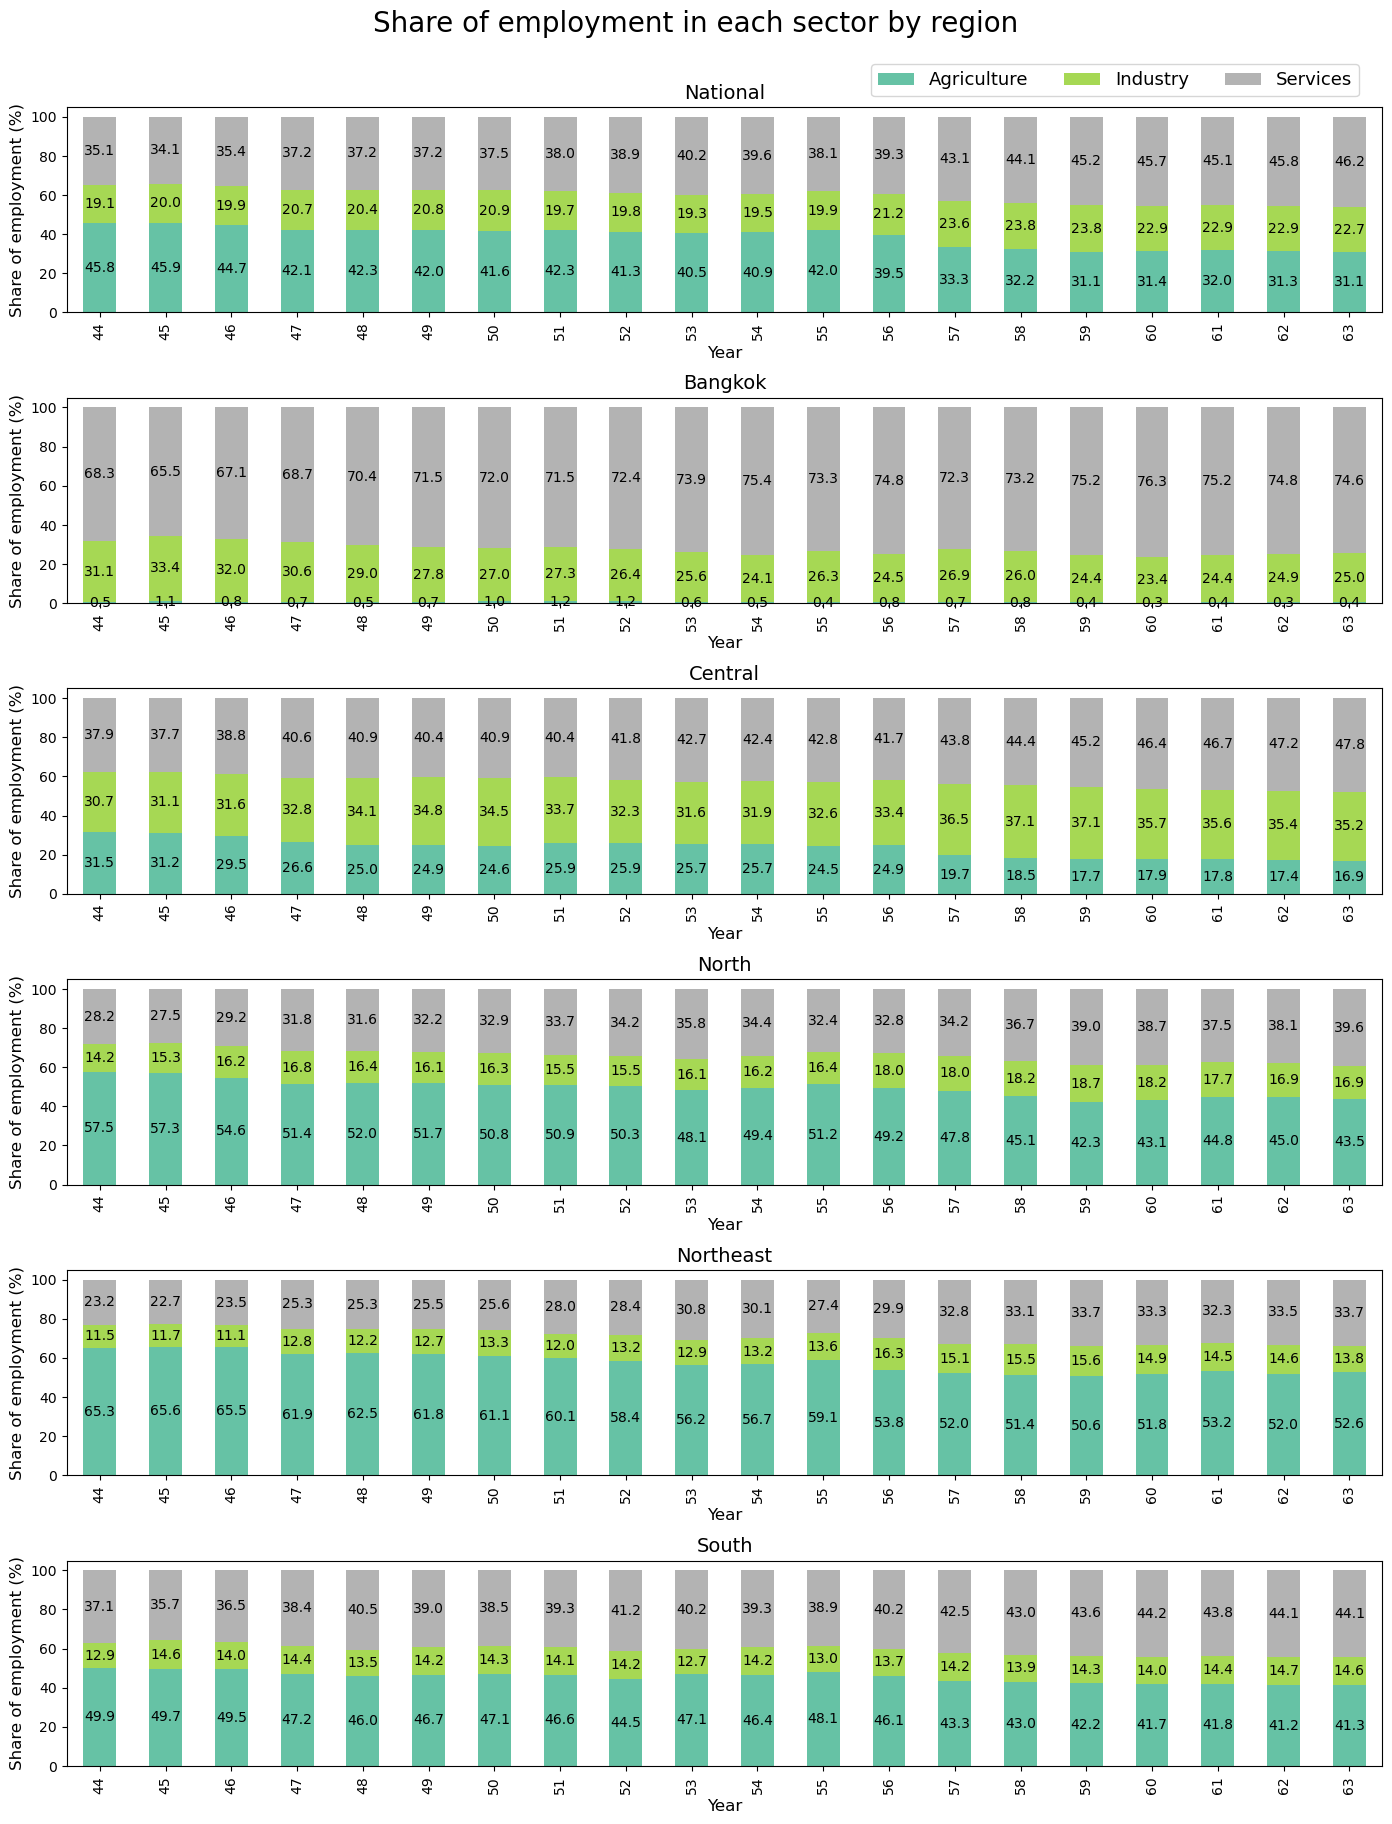

In [49]:
#### Plot the shares of sectors in each year.
### Each region as a subplot.
region_names = ["National", "Bangkok", "Central", "North", "Northeast", "South"]

fig, axs = plt.subplots(6, 1, figsize=(14, 18))

for ax, region in enumerate(region_names[:-1]):
    # reshape the data to a wide format then Plot
    pd.pivot_table(All_YEAR_ALL_AGE_SEC_annual_pct_final[All_YEAR_ALL_AGE_SEC_annual_pct_final["REG"] == ax], index = "Year", columns = "SECTOR", values = "Percentage").plot(kind = "bar", stacked = True, ax = axs[ax], legend=False, colormap='Set2')
    axs[ax].set_title(region, fontsize = 14)
    axs[ax].set_ylabel('Share of employment (%)', fontsize = 12)
    axs[ax].set_xlabel('Year', fontsize = 12)

    # Add value labels.
    for p in axs[ax].patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        axs[ax].annotate(round(height,1), (x + width/2, y + height/2), ha='center', va='center')

## Plot region 5.
pd.pivot_table(All_YEAR_ALL_AGE_SEC_annual_pct_final[All_YEAR_ALL_AGE_SEC_annual_pct_final["REG"] == 5], index = "Year", columns = "SECTOR", values = "Percentage").plot(kind = "bar", stacked = True, ax = axs[5], legend=True, colormap='Set2')
axs[5].set_title('South', fontsize = 14)
axs[5].set_ylabel('Share of employment (%)', fontsize = 12)
axs[5].set_xlabel('Year', fontsize = 12)
axs[5].get_legend().remove()

# Add value labels.
for p in axs[5].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    axs[5].annotate(round(height,1), (x + width/2, y + height/2), ha='center', va='center') # annotate point x y with text.

## Add a legend.
handles, labels = axs[5].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize = 13, ncols = 3, bbox_to_anchor=(0.98, 0.985))

## Add main title.
fig.suptitle('Share of employment in each sector by region', fontsize = 20, y =1.01)

fig.tight_layout(pad=1.0)

We can see that the strucutral transformation is uneven across regions. There is virtually no agricultural employment in Bangkok. While the share of agricultural employment in the Central region halved over the 20 years period, the reduction in other regions is not as sharp, especially in the South.

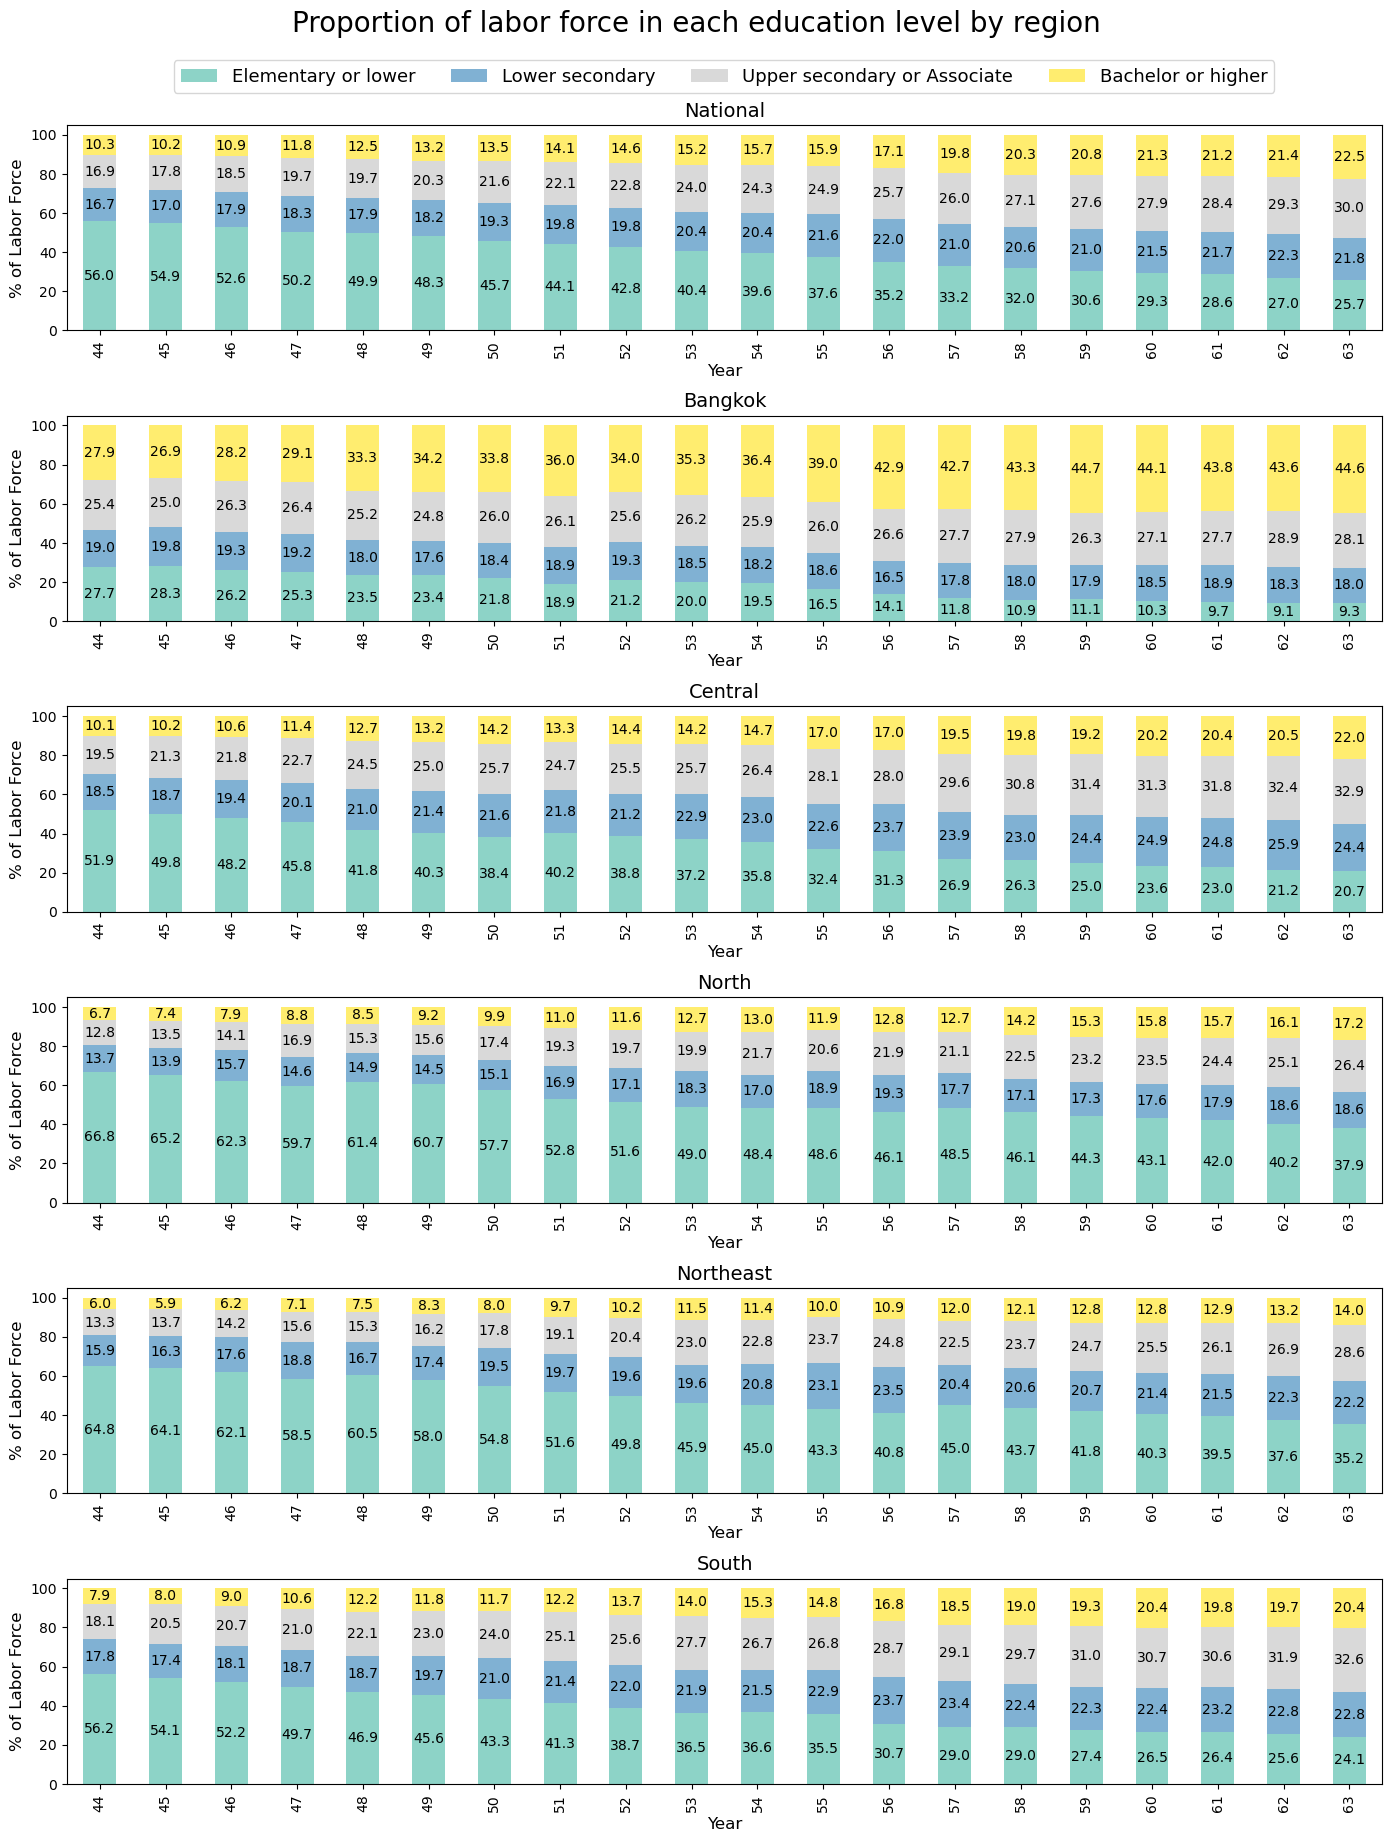

In [50]:
### Plot education level shares in each year.
### Each region as a subplot.
fig, axs = plt.subplots(6, 1, figsize=(14, 18))

for ax, region in enumerate(region_names[:-1]):
    # reshape the data to a wide format then Plot
    pd.pivot_table(All_YEAR_ALL_AGE_EDU_annual_pct_final[All_YEAR_ALL_AGE_EDU_annual_pct_final["REG"] == ax], index = "Year", columns = "EDCODE_NEW", values = "Percentage").plot(kind = "bar", stacked = True, ax = axs[ax], legend=False, colormap='Set3')
    axs[ax].set_title(region, fontsize = 14)
    axs[ax].set_ylabel('% of Labor Force', fontsize = 12)
    axs[ax].set_xlabel('Year', fontsize = 12)

    # Add value labels.
    for p in axs[ax].patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        axs[ax].annotate(round(height,1), (x + width/2, y + height/2), ha='center', va='center')

## Plot region 5.
pd.pivot_table(All_YEAR_ALL_AGE_EDU_annual_pct_final[All_YEAR_ALL_AGE_EDU_annual_pct_final["REG"] == 5], index = "Year", columns = "EDCODE_NEW", values = "Percentage").plot(kind = "bar", stacked = True, ax = axs[5], colormap='Set3')
axs[5].set_title('South', fontsize = 14)
axs[5].set_ylabel('% of Labor Force', fontsize = 12)
axs[5].set_xlabel('Year', fontsize = 12)
axs[5].yaxis.set_tick_params(labelbottom=True)
axs[5].get_legend().remove()

# Add value labels.
for p in axs[5].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    axs[5].annotate(round(height,1), (x + width/2, y + height/2), ha='center', va='center') # annotate point x y with text.

## Add a legend.
handles, labels = axs[5].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', fontsize = 13, ncols = 5, bbox_to_anchor=(0.52, 0.997))

## Add main title.
fig.suptitle('Proportion of labor force in each education level by region', fontsize = 20, y = 1.02)

fig.tight_layout(pad=1.0)

There is a considerable improvement in terms of education attainment across all regions. Even though the proportion of labor force with at least a high school degree in the South is about the same as the Central region, workers in the South are about 2.5 times more likely to be employed in agriculture. Labor force in the Northeast also has slightly higher education attaintment than the North region but the share of agricultural employment is about 10 percentage points higher in the Northeast.

This also suggests that are other important factors apart from education that are shaping the distribution of employment across sectors in Thailand, which is consistent with the findings from the international data.

C:\Users\fphak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\fphak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\fphak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\fphak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

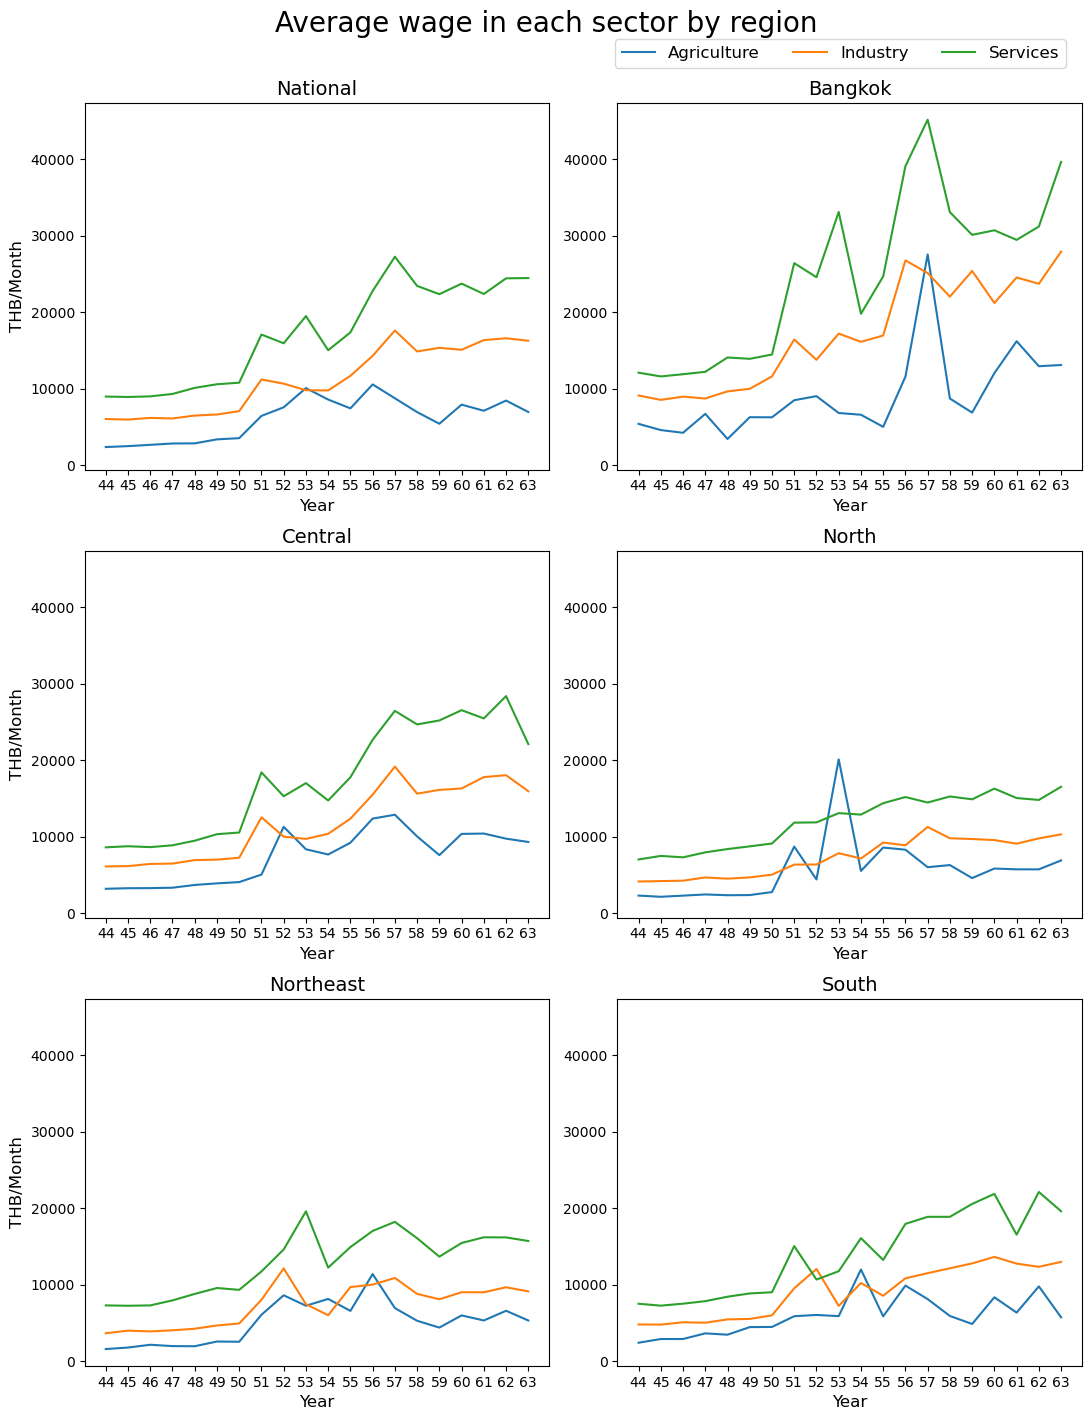

In [51]:
### Plot the average wage in each sector by year.
fig, axs = plt.subplots(3, 2, figsize=(11, 14), sharey = True)

# Side task: make year as str. To have no decimal.
All_YEAR_WAGE_SEC_annual_final["Year"] = All_YEAR_WAGE_SEC_annual_final["Year"].astype(str)

## Line plot for each sector.
for region, ax in zip(region_names[:-1], axs.ravel()):
    reg_num = region_names.index(region)
    sns.lineplot(data = All_YEAR_WAGE_SEC_annual_final[All_YEAR_WAGE_SEC_annual_final["REG"] == reg_num], x = "Year", y = "WAGE", hue = "SECTOR", ax = ax, palette = "tab10", legend=False)
    ax.set_title(region, fontsize = 14)
    ax.set_ylabel('THB/Month', fontsize = 12)
    ax.set_xlabel('Year', fontsize = 12)
    ax.yaxis.set_tick_params(labelbottom=True) ## To retain the value labels on the axis.

## Plot region 5.
sns.lineplot(data = All_YEAR_WAGE_SEC_annual_final[All_YEAR_WAGE_SEC_annual_final["REG"] == 5], x = "Year", y = "WAGE", hue = "SECTOR", ax = axs[2,1], palette = "tab10")
axs[2,1].set_title('South', fontsize = 14)
axs[2,1].set_ylabel('THB/Month', fontsize = 12)
axs[2,1].set_xlabel('Year', fontsize = 12)
axs[2,1].get_legend().remove()
axs[2,1].yaxis.set_tick_params(labelbottom=True)


## Add main title.
fig.suptitle('Average wage in each sector by region', fontsize = 20, y = 1.01)

## Add a legend.
handles, labels = axs[2,1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize = 12, ncols = 3, bbox_to_anchor=(0.98, 0.995))

fig.tight_layout(pad=1.0)

Looking at the average across sectors, we can see that the average wage of workers in manufacturing and services is higher than the average wage of workers in agriculture. The gap between the average wage of workers in agriculture and the other two sectors is not so large in the North, the Northeast, and the South. 

From this preliminary analysis, it is possible that manufacturing and services firms in regions outside of Bangkok and the Central region might not be so productive and profitable. Hence, they pay lower wages which reduce the incentive for workers to move out of agriculture.

## Conclusion

Overall, the analysis suggests that education is an important factor that could explain the high level of agricultural employment in Thailand despite its level of income. However, the evidence also suggests that there are other important factors that could explain the puzzle. One potential explanation is that, in many parts of Thailand, manufacturing and services firms are significantly less productive and less able to pay high wages. Hence, the incentive for workers to move out of agriculture is reduced in those regions. 

However, more data and more rigorous analysis are needed to support this hypothesis.